In [1]:
import scanpy as sc
import scanpy.external as sce
import anndata as ad
import numpy as np
import pandas as pd
import episcanpy.api as epi
import matplotlib.pyplot as plt

STUD_PATH = '/mnt/workspace_stud/'
OUTPUT_PATH = f'{STUD_PATH}stud2/output/'

In [2]:
INPUT_PATH = f'{OUTPUT_PATH}wp1/liver_sample_9_pp17.h5ad'
#TISSUE = INPUT_PATH.split('/')[-1].replace('_pp17.h5ad', '')
#TSV_OUT = f"{OUTPUT_PATH}clusters_{TISSUE}.tsv"

In [3]:
adata = ad.read(INPUT_PATH)
adata

AnnData object with n_obs × n_vars = 17070 × 12880
    obs: 'nb_features'
    var: 'n_cells', 'commonness', 'prop_shared_cells', 'variability_score'
    layers: 'binary'

In [4]:
epi.pp.log1p(adata)

In [5]:
#epi.pp.lazy(adata, min_dist=1.0, spread=2.0)
sc.pp.pca(adata, n_comps=50, svd_solver='arpack', use_highly_variable=False)
sc.pp.neighbors(adata, n_neighbors=25, n_pcs=50, method='umap', metric='euclidean')

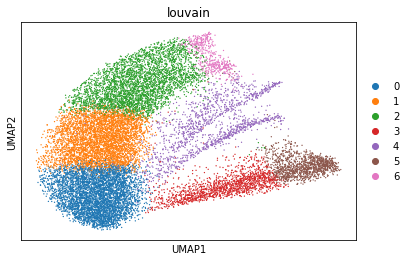

In [6]:
sc.tl.umap(adata)
epi.tl.louvain(adata, use_weights=True)
epi.pl.umap(adata, color=['louvain'])

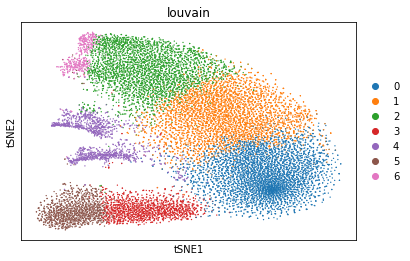

In [7]:
sc.tl.tsne(adata, n_pcs=50, perplexity=30)
sc.pl.tsne(adata, color=['louvain'])

In [ ]:
ncols = 10
nrows = 10
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
#ax = ax.ravel()
min_dists = np.arange(0.1, 1.1, 0.1)
spreads = np.arange(0.5, 5.1, 0.5)

#sc.tl.umap(adata, min_dist=0.5, spread=1.0, n_components=2)
for i in range(len(min_dists)):
    for j in range(len(spreads)):
        sc.tl.umap(adata, ranges[i], spreads[j])
        epi.tl.louvain(adata)
        epi.pl.umap(adata,
                    color=['louvain'],
                    ax=ax[i, j],
                    show=False,
                    title=f"min_dist={min_dists[i]}, spread={spreads[j]}")

In [ ]:
ncols = 5
nrows = 5
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
#ax = ax.ravel()
min_dists = np.arange(0.2, 1.1, 0.2)
spreads = np.arange(0.2, 1.1, 0.2)

#sc.tl.umap(adata, min_dist=0.5, spread=1.0, n_components=2)
for i in range(len(min_dists)):
    for j in range(len(spreads)):
        sc.tl.umap(adata, ranges[i], spreads[j])
        epi.tl.louvain(adata)
        epi.pl.umap(adata,
                    color=['louvain'],
                    ax=ax[i, j],
                    show=False,
                    title=f"min_dist={min_dists[i]}, spread={spreads[j]}")

In [ ]:
for i in np.arange(0.5, 5.1, 0.5):
    sc.tl.umap(adata, 0.1, i)
    epi.tl.louvain(adata)
    epi.pl.umap(adata, color=['louvain'], title=f"spread: {i}")

In [ ]:
# Ergebnisse bisher: 
# Bestes Umap bei min_dist = 0.1, spread = 2.0

In [ ]:
sc.tl.umap(adata, 0.1, 2.0)
for i in np.arange(0.1, 1.1, 0.1):
    epi.tl.louvain(adata, resolution=i, use_weights=True)
    epi.tl.leiden(adata, resolution=i, use_weights=True)
    epi.pl.umap(adata, color=['louvain', 'leiden'])

In [ ]:
# Bestes Ergebnis Cluster:
# Resolution=0.5 - 0.8

In [ ]:
ncols = 5
nrows = 2
fig, ax = plt.subplots(nrows, ncols, figsize=(ncols*5, nrows*5))
ax = ax.ravel()
resolutions = np.arange(0.1, 1.1, 0.1)

sc.tl.umap(adata, 0.1, 2.0)
for i in range(len(resolutions)):
    epi.tl.louvain(adata, resolution=resolutions[i], use_weights=True)
    epi.pl.umap(adata, color=['louvain'], ax=ax[i], title=f"resolution={resolutions[i]:.1}", show=False)

In [ ]:
sc.tl.umap(adata, 0.1, 2.0)
epi.tl.louvain(adata, resolution=0.7, use_weights=True)
epi.pl.umap(adata, color=['louvain'])

In [ ]:
sc.tl.tsne(adata, n_pcs=50, perplexity=30)
sc.pl.tsne(adata, color=['louvain'])

In [ ]:
adata.var